<a href="https://colab.research.google.com/github/Manoj-Routhu/sentiment-analysis/blob/main/twitter-sentiment-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 50.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=69adc4d28a7db4ccea99f81c3f585a94aa0925ceb2ed904ce078ad87ddf0903a
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.8 MB/s eta 0:00:00
  Prepa

In [3]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=de172a38e4afff12002c0baf83b06958a3a3b48fd586f9e6a76cebf29dca7b6e
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn


In [4]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
consumerKey = "8SokfXDnGAI5xFzq5i4N7mz80"
consumerSecret = "AVPd5cj9aFFEerVPwTKyjeuJtoNnrVVnyo3PC4tHwI41uEKq99"
accessToken = "1393472744306532360-FGdHBhF3XAtTD8DgSuSo7EgyZ3s1uq"
accessTokenSecret = "9nprttwHGvAbZhjVQgQ3JL6UuO3Nd6Wgg5hB3N3Meyal2"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)
#AAAAAAAAAAAAAAAAAAAAAOiJjQEAAAAASi%2BwSYkR%2FMqOK26umMe7KknIrLA%3DwaUTXuoTURnxinQdFYrAcUEe2PEiEQxRLU1Gz8C5ampyAn5nDp

In [7]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
  negative_list.append(tweet.text)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet.text)
  positive += 1
 
 elif pos == neg:
  neutral_list.append(tweet.text)
  neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: #RC15
Please enter how many tweets to analyze: 500


In [8]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive sentiment: ",len(positive_list))
print("negative sentiment: ", len(negative_list))
print("neutral sentiment: ",len(neutral_list))

total number:  500
positive sentiment:  101
negative sentiment:  37
neutral sentiment:  362


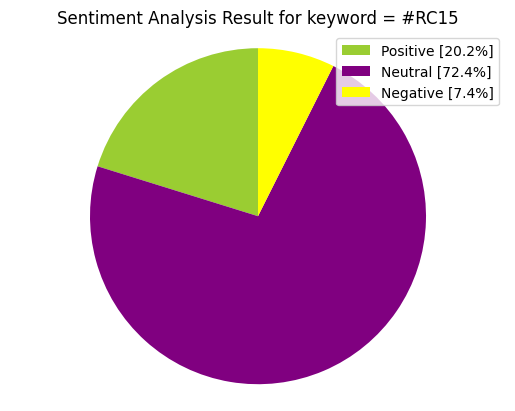

,0
0,RT @YakkalaAnil916: #Virupaksha #RamCharan𓃵 ##...
1,RT @YakkalaAnil916: #Virupaksha #RamCharan𓃵 ##...
2,షూటింగ్ కు బ్రేక్\n\nWatch Video&gt;&gt;&gt;\n...
3,RT @YakkalaAnil916: #Virupaksha #RamCharan𓃵 ##...
4,RT @AlluBoyPraveen: Their Bond ❤️😍\n@AlluArjun...
...,...
495,RT @SagarCharanism: Okkadive @AlwaysRamCharan ...
496,#Virupaksha #RamCharan𓃵 ##RC15 #soniyasingh 👌👌...
497,RT @akaDaniDanill: Which actor has the best fi...
498,RT @akaDaniDanill: Which actor has the best fi...


In [9]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'purple','yellow']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword = "+keyword+"" )
plt.axis('equal')
plt.show()

tweet_list


In [10]:
tweet_list.drop_duplicates(inplace = True)

In [11]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([-⁰9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @YakkalaAnil916: #Virupaksha #RamCharan𓃵 ##...,# # 𓃵 ## 15 # 👌...
2,షూటింగ్ కు బ్రేక్\n\nWatch Video&gt;&gt;&gt;\n...,షూటింగ్ కు బ్రేక్\n\n & ;& ;& ;\n...
4,RT @AlluBoyPraveen: Their Bond ❤️😍\n@AlluArjun...,"❤️😍\n \n\n"" ..."
5,RT @im_RCult: It's @shankarshanmugh's long dre...,' ' ...
6,RT @TweetRamCharan: Assignment 1 - Title 8:19 ...,1 8:1 \n\n# 15 # ...
7,RT @TEJATheRoyal369: Ey Star undadu inkaa 🤙 Ok...,🤙 # ...
8,RT @Yevadu_: Thanks to @TeamRC_Vizag Founder @...,_ ...
9,RT @Hemanth_RcCult: Here's the Thread of #Oran...,' # ...
10,RT @RamCharanCult27: #RC15 #GameChanger update...,# 15 # 🙏
11,RC16 - Team Clarity: అతని బయోపిక్‌ కాదు!\nhttp...,16 : అతని బయోపిక్‌ కాదు!\n ...


In [12]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']

 if neg > pos:
   tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
   tw_list.loc[index, 'sentiment'] = "positive"
 else:
   tw_list.loc[index, 'sentiment'] = "neutral"
   tw_list.loc[index, 'neg'] = neg
   tw_list.loc[index, 'neu'] = neu
   tw_list.loc[index, 'pos'] = pos
   tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

<ipython-input-12-e78a1dd8e5bd>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @YakkalaAnil916: #Virupaksha #RamCharan𓃵 ##...,# # 𓃵 ## 15 # 👌...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,షూటింగ్ కు బ్రేక్\n\nWatch Video&gt;&gt;&gt;\n...,షూటింగ్ కు బ్రేక్\n\n & ;& ;& ;\n...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,RT @AlluBoyPraveen: Their Bond ❤️😍\n@AlluArjun...,"❤️😍\n \n\n"" ...",0.0,0.0,neutral,0.0,1.0,0.0,0.0
5,RT @im_RCult: It's @shankarshanmugh's long dre...,' ' ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
6,RT @TweetRamCharan: Assignment 1 - Title 8:19 ...,1 8:1 \n\n# 15 # ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,RT @TEJATheRoyal369: Ey Star undadu inkaa 🤙 Ok...,🤙 # ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,RT @Yevadu_: Thanks to @TeamRC_Vizag Founder @...,_ ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
9,RT @Hemanth_RcCult: Here's the Thread of #Oran...,' # ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
10,RT @RamCharanCult27: #RC15 #GameChanger update...,# 15 # 🙏,0.0,0.0,neutral,0.0,1.0,0.0,0.0
11,RC16 - Team Clarity: అతని బయోపిక్‌ కాదు!\nhttp...,16 : అతని బయోపిక్‌ కాదు!\n ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [13]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,84,100.0


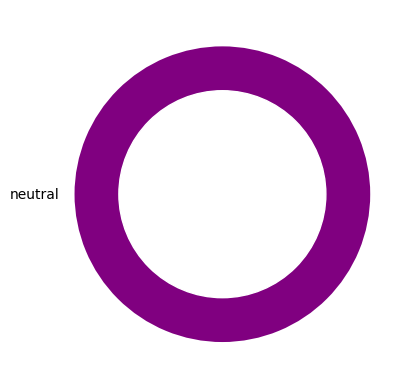

In [15]:
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['purple', 'yellow' ,'yellowgreen'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [16]:

tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
neutral,9.94


In [17]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))



In [18]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [19]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [20]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [21]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords 
    return text

tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @YakkalaAnil916: #Virupaksha #RamCharan𓃵 ##...,# # 𓃵 ## 15 # 👌...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,75,10,𓃵 👌👌👌😍😍😍 ...,"[, 𓃵, ]","[, 𓃵, ]","[, 𓃵, ]"
2,షూటింగ్ కు బ్రేక్\n\nWatch Video&gt;&gt;&gt;\n...,షూటింగ్ కు బ్రేక్\n\n & ;& ;& ;\n...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,89,15,షూటింగ్ కు బ్రేక్\n\n \n ...,"[ష, ట, గ, క, బ, ర, క, ]","[ష, ట, గ, క, బ, ర, క, ]","[ష, ట, గ, క, బ, ర, క, ]"
4,RT @AlluBoyPraveen: Their Bond ❤️😍\n@AlluArjun...,"❤️😍\n \n\n"" ...",0.0,0.0,neutral,0.0,1.0,0.0,0.0,97,11,❤️😍\n \n\n ...,"[, 𓃵, 𓃵, ]","[, 𓃵, 𓃵, ]","[, 𓃵, 𓃵, ]"
5,RT @im_RCult: It's @shankarshanmugh's long dre...,' ' ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,107,4,...,"[, ]","[, ]","[, ]"
6,RT @TweetRamCharan: Assignment 1 - Title 8:19 ...,1 8:1 \n\n# 15 # ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,87,8,\n\n ...,"[, ]","[, ]","[, ]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Ram Charan : మెగా వారసుడు కాదు వారసురాలు.. రామ...,: మెగా వారసుడు కాదు వారసురాలు.. రామ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,140,20,మెగా వారసుడు కాదు వారసురాలు రామ్ చ...,"[, మ, గ, వ, రస, డ, క, ద, వ, రస, ర, ల, ర, మ, చర...","[, మ, గ, వ, రస, డ, క, ద, వ, రస, ర, ల, ర, మ, చర...","[, మ, గ, వ, రస, డ, క, ద, వ, రస, ర, ల, ర, మ, చర..."
484,Andariki namaskaram🙏evaraythe ee post ni chusi...,🙏 ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,140,7,🙏 ...,"[, ]","[, ]","[, ]"
487,100\n1000\n1200\nLekka takkuva kakunda chusko ...,100\n1000\n1200\n ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,87,13,\n\n\n \n 💥\n \n...,"[, ]","[, ]","[, ]"
496,#Virupaksha #RamCharan𓃵 ##RC15 #soniyasingh 👌👌...,# # 𓃵 ## 15 # 👌👌...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,74,10,𓃵 👌👌👌😍😍😍 ...,"[, 𓃵, ]","[, 𓃵, ]","[, 𓃵, ]"
